##**1. Import Library**

In [ ]:
# install category encoders
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install kneed

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 18.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039295 sha256=b16104c0e263cde0441fe87a657a74a8abd8d5163dcd7e83eb5a6a3d586f60cb
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Common library used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from kneed import KneeLocator
import optuna
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Encoder
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

#Preprocessing ML
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler,OneHotEncoder,StandardScaler,FunctionTransformer,LabelEncoder
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from feature_engine.outliers import Winsorizer
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler


# ML algorithms
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,OPTICS,Birch
from hdbscan import HDBSCAN
from sklearn.neighbors import NearestNeighbors

#metrics evaluation
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples,silhouette_score,davies_bouldin_score,calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer


##**2. Load Dataset**

In [ ]:
# load dataset from google drive storage
df = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Brazilian E-commerce Public Dataset/Dataset/df_rfm_clean.csv')
df

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_Score,customer_segmentation,marketing_strategy
0,00012a2ce6f8dcda20d059ce98491703,288,1,114.74,2,1,3,213,Promising,"Offer discounts, gifts and free trials"
1,000161a058600d5901f007fab4c27140,409,1,67.41,1,1,2,112,Cannot Lose Them,Get them back with renewals or newer products ...
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,1,1,4,114,Cannot Lose Them,Get them back with renewals or newer products ...
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35,1,1,4,114,Cannot Lose Them,Get them back with renewals or newer products ...
4,000379cdec625522490c315e70c7a9fb,149,1,107.01,3,1,3,313,Promising,"Offer discounts, gifts and free trials"
...,...,...,...,...,...,...,...,...,...,...
90194,fffb97495f78be80e2759335275df2aa,225,1,61.01,2,1,2,212,Promising,"Offer discounts, gifts and free trials"
90195,fffcb937e9dd47a13f05ecb8290f4d3e,165,1,91.91,3,1,2,312,New Customers,Provide on-boarding support
90196,fffeda5b6d849fbd39689bb92087f431,99,1,63.13,4,1,2,412,New Customers,Provide on-boarding support
90197,ffff42319e9b2d713724ae527742af25,77,1,214.13,4,1,4,414,Promising,"Offer discounts, gifts and free trials"


In [ ]:
# check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90199 entries, 0 to 90198
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            90199 non-null  object 
 1   recency                90199 non-null  int64  
 2   frequency              90199 non-null  int64  
 3   monetary               90199 non-null  float64
 4   r_score                90199 non-null  int64  
 5   f_score                90199 non-null  int64  
 6   m_score                90199 non-null  int64  
 7   rfm_Score              90199 non-null  int64  
 8   customer_segmentation  90199 non-null  object 
 9   marketing_strategy     90199 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 6.9+ MB


###**a. Statistical Summary**

In [ ]:
# check stats summary
df[['recency','frequency','monetary']].describe().T

,count,mean,std,min,25%,50%,75%,max
recency,90199.0,238.876961,152.661957,0.00,115.0,219.00,348.00,695.00
frequency,90199.0,1.098338,0.453835,1.00,1.0,1.00,1.00,20.00
monetary,90199.0,156.739760,216.376148,10.07,61.0,103.11,172.66,13664.08


In [ ]:
# Define a function to visualize Boxplot and Histogram plots and display additional information
def visualize_boxplot_histogram(df, column):
    # Create a figure and define its size
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))

    # Create a Boxplot
    sns.boxplot(x=column, data=df, ax=axs[0])
    axs[0].set_title(f'Boxplot of {column}')

    # Create a Histogram plot
    sns.histplot(data=df, x=column, kde=True, ax=axs[1])
    axs[1].set_title(f'Histogram of {column}')

    # Calculate the IQR and the upper and lower bounds
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Display additional information about the column
    print(f'\nInformation of {column}:')
    print(f'Any Outlier: {"Yes" if ((df[column] < lower_bound) | (df[column] > upper_bound)).sum() > 0 else "No"}')
    print(f'Distribution of Data: {"Normal" if df[column].skew() == 0 else "Positif Skewness" if df[column].skew() > 0 else "Negatif Skewness"}')
    print(f'Min: {df[column].min()}')
    print(f'Max: {df[column].max()}')
    print(f'Mean: {df[column].mean()}')
    print(f'Median: {df[column].median()}')

    # Show the plots
    plt.tight_layout()
    plt.show()


Information of recency:
Any Outlier: No
Distribution of Data: Positif Skewness
Min: 0
Max: 695
Mean: 238.8769609419173
Median: 219.0


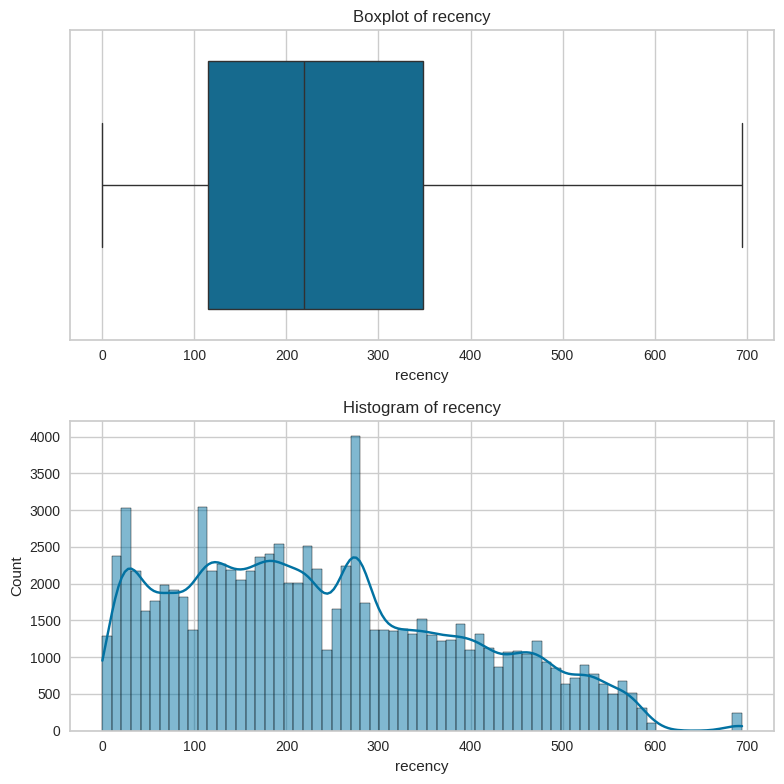

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(df, 'recency')


Information of frequency:
Any Outlier: Yes
Distribution of Data: Positif Skewness
Min: 1
Max: 20
Mean: 1.098338119047883
Median: 1.0


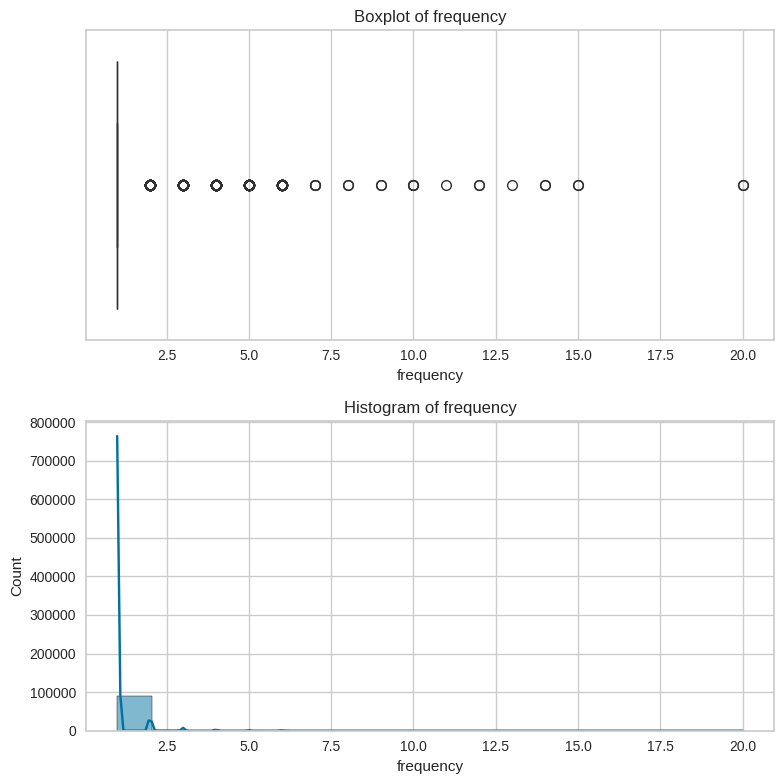

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(df, 'frequency')

In [ ]:
df.frequency.value_counts()

1     84024
2      4711
3       815
4       341
5       145
6       143
7         3
10        3
8         2
12        2
15        2
9         2
14        2
20        2
13        1
11        1
Name: frequency, dtype: int64


Information of monetary:
Any Outlier: Yes
Distribution of Data: Positif Skewness
Min: 10.07
Max: 13664.08
Mean: 156.7397604186299
Median: 103.11


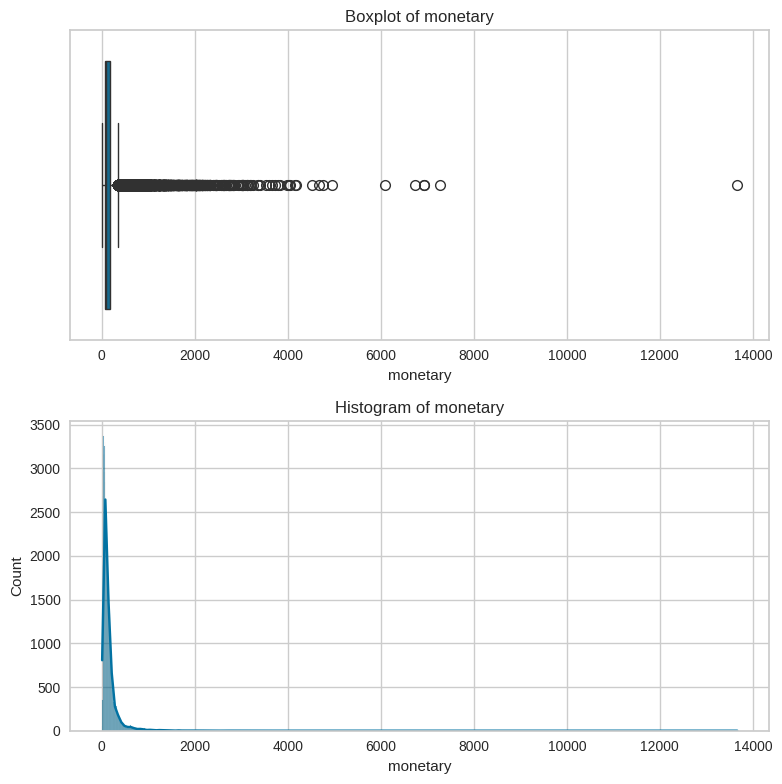

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(df, 'monetary')

##**3. Feature Engineering**

###**a. Data Sampling**

In [ ]:
def sample_equally_by_quantiles(df, column, total_samples, quantiles, random_state):
    """
    Mengambil sampel dari DataFrame dengan cara yang seimbang antar quantile berdasarkan jumlah data yang tersedia.

    Parameters:
    - df: DataFrame yang akan disampling.
    - column: Nama kolom yang akan digunakan untuk quantile.
    - total_samples: Jumlah total sampel yang diinginkan.
    - quantiles: Jumlah quantile yang akan digunakan.
    - random_state: Seed untuk reproducibility sampling.

    Returns:
    - final_sample: DataFrame yang berisi sampel yang diambil.
    """
    # Menghitung jumlah sampel per quantile berdasarkan proporsi data yang tersedia
    quantile_limits = [i / quantiles for i in range(quantiles + 1)]
    quantile_values = df[column].quantile(quantile_limits).values

    sampled_dfs = []
    samples_collected = 0

    for i in range(len(quantile_values)-1):
        lower_bound = quantile_values[i]
        upper_bound = quantile_values[i+1]

        if i == len(quantile_values) - 2:  # Termasuk nilai tepat pada upper bound untuk quantile terakhir
            quantile_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        else:
            quantile_df = df[(df[column] >= lower_bound) & (df[column] < upper_bound)]

        available_samples = len(quantile_df)
        quantile_sample_size = min(available_samples, (total_samples - samples_collected) // (quantiles - i))

        sampled_df = quantile_df.sample(n=quantile_sample_size, random_state=random_state)
        samples_collected += len(sampled_df)
        sampled_dfs.append(sampled_df)

    final_sample = pd.concat(sampled_dfs).reset_index(drop=True)
    return final_sample

In [ ]:
# Contoh penggunaan fungsi pada DataFrame 'df'
# Asumsikan 'df' adalah DataFrame Anda dan 'monetary' adalah kolom yang ingin Anda gunakan untuk sampling
# Untuk demo, kita akan menggunakan DataFrame 'df' yang dibuat sebelumnya
equally_sampled_df = sample_equally_by_quantiles(df, 'monetary', total_samples=10000, quantiles=4, random_state=42)
equally_sampled_df.shape  # Memeriksa ukuran sampel akhir

(10000, 10)

In [ ]:
# copy previous dataframe
df_fe = equally_sampled_df[['recency','frequency','monetary']].copy()
df_fe

,recency,frequency,monetary
0,219,1,54.09
1,271,1,47.00
2,141,1,50.22
3,206,1,53.99
4,196,1,40.07
...,...,...,...
9995,468,1,188.34
9996,323,1,358.83
9997,158,1,318.78
9998,430,1,216.93


###**a. Data Transformation**

In [ ]:
def transform_data(data, transformations):
    transformed_data = data.copy()
    for col in transformed_data.columns:
        if 'log1p' in transformations:
            transformed_data[col] = np.log1p(transformed_data[col])
        if 'yeojohnson' in transformations:
            transformed_data[col] = PowerTransformer(method='yeo-johnson').fit_transform(transformed_data[[col]])
        if 'sqrt' in transformations:
            transformed_data[col] = np.sqrt(transformed_data[col])
    return transformed_data

In [ ]:
log_transformed_data = transform_data(df_fe, 'log1p')
yeo_transformed_data = transform_data(df_fe, 'yeojohnson')
sqrt_transformed_data = transform_data(df_fe, 'sqrt')

####**- Logaritmic**

In [ ]:
log_transformed_data.head()

,recency,frequency,monetary
0,5.393628,0.693147,4.008968
1,5.605802,0.693147,3.871201
2,4.955827,0.693147,3.936130
3,5.332719,0.693147,4.007151
4,5.283204,0.693147,3.715278



Information of recency:
Any Outlier: Yes
Distribution of Data: Negatif Skewness
Min: 0.0
Max: 6.54534966033442
Mean: 5.164312566222013
Median: 5.393627546352361


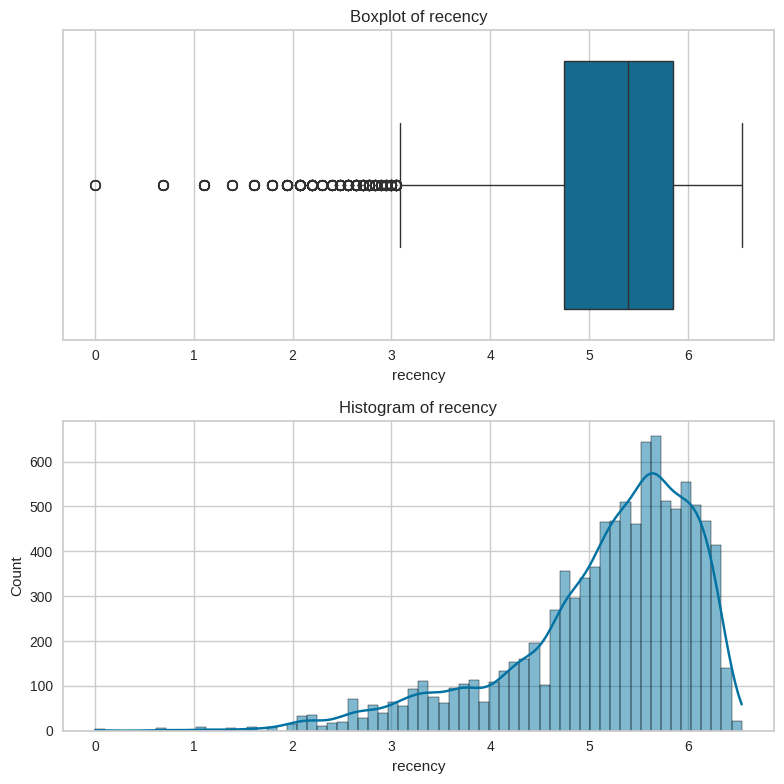

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(log_transformed_data, 'recency')


Information of frequency:
Any Outlier: Yes
Distribution of Data: Positif Skewness
Min: 0.6931471805599453
Max: 2.5649493574615367
Mean: 0.7252441866525277
Median: 0.6931471805599453


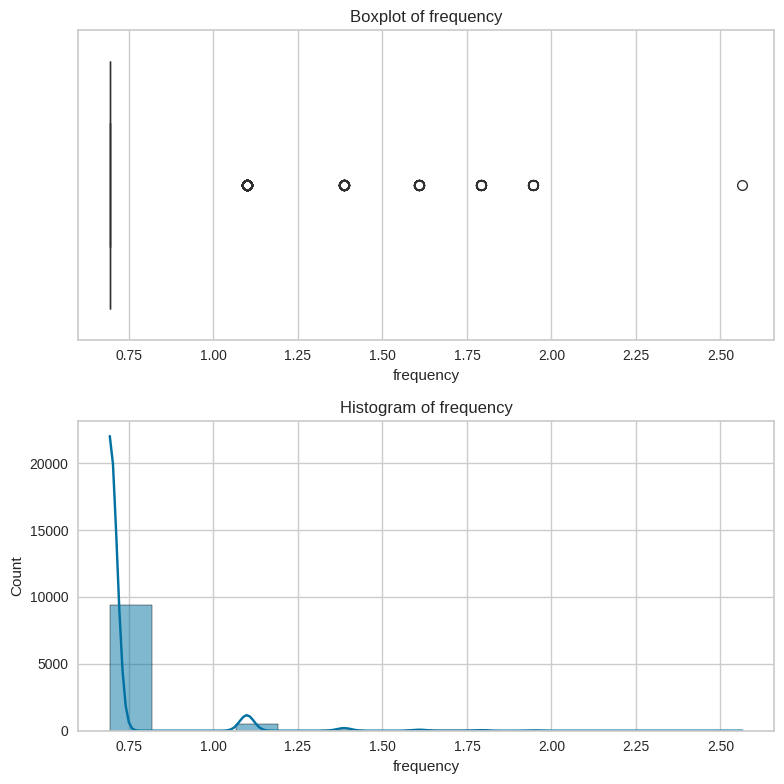

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(log_transformed_data, 'frequency')


Information of monetary:
Any Outlier: Yes
Distribution of Data: Positif Skewness
Min: 2.6311691567662523
Max: 8.843659824228189
Mean: 4.687796073544388
Median: 4.645399976373027


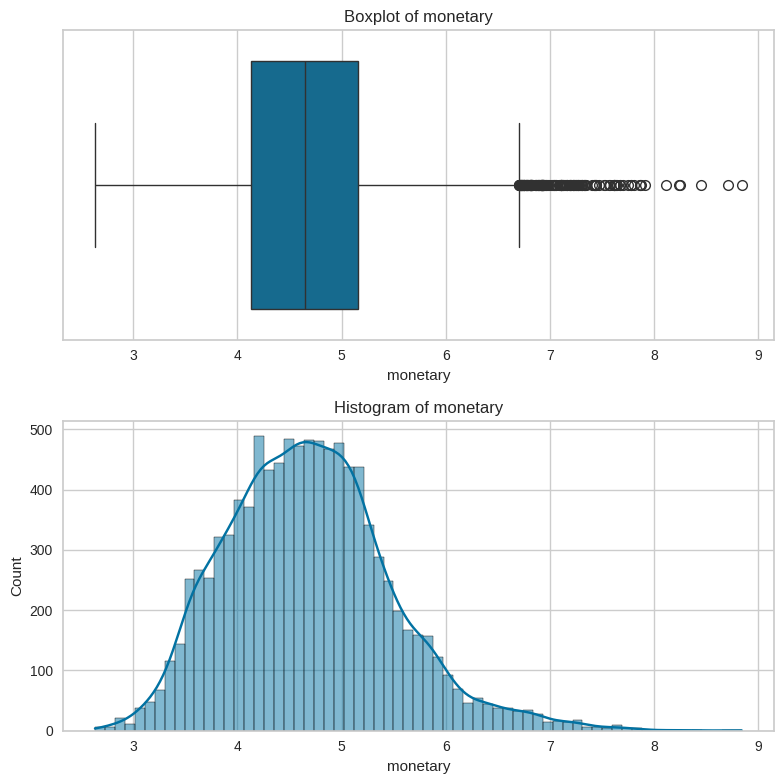

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(log_transformed_data, 'monetary')

####**- Yeo-Johnson**

In [ ]:
yeo_transformed_data.head()

,recency,frequency,monetary
0,0.040373,-0.261053,-0.854035
1,0.354920,-0.261053,-1.063394
2,-0.503095,-0.261053,-0.963923
3,-0.043325,-0.261053,-0.856754
4,-0.109323,-0.261053,-1.308226



Information of recency:
Any Outlier: No
Distribution of Data: Negatif Skewness
Min: -2.362349808539993
Max: 2.289372802069339
Mean: 6.821210263296961e-17
Median: 0.04037269902092113


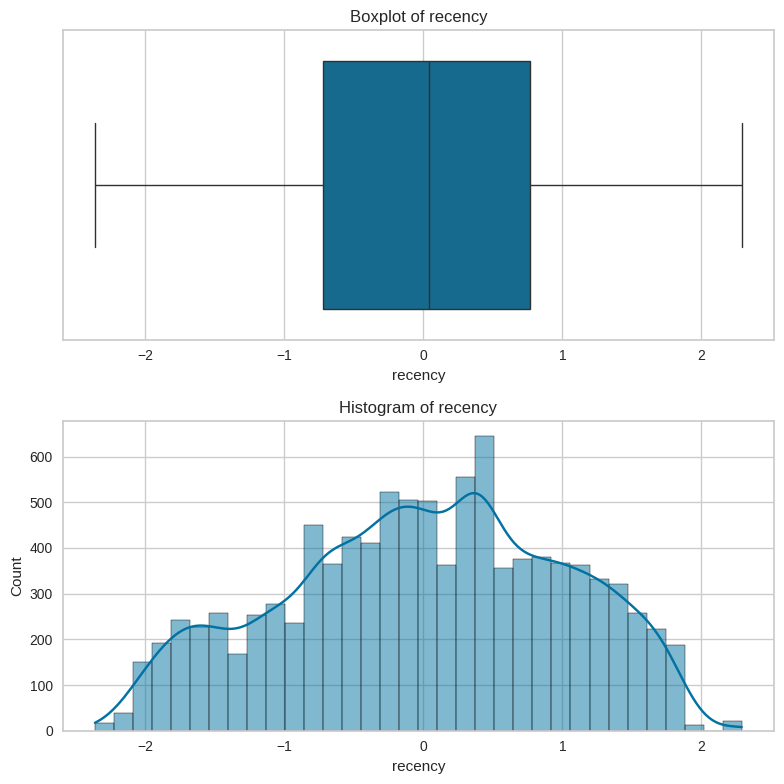

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(yeo_transformed_data, 'recency')


Information of frequency:
Any Outlier: Yes
Distribution of Data: Positif Skewness
Min: -0.2610530278632138
Max: 3.8306731625303216
Mean: -1.6312767651641025e-06
Median: -0.2610530278632138


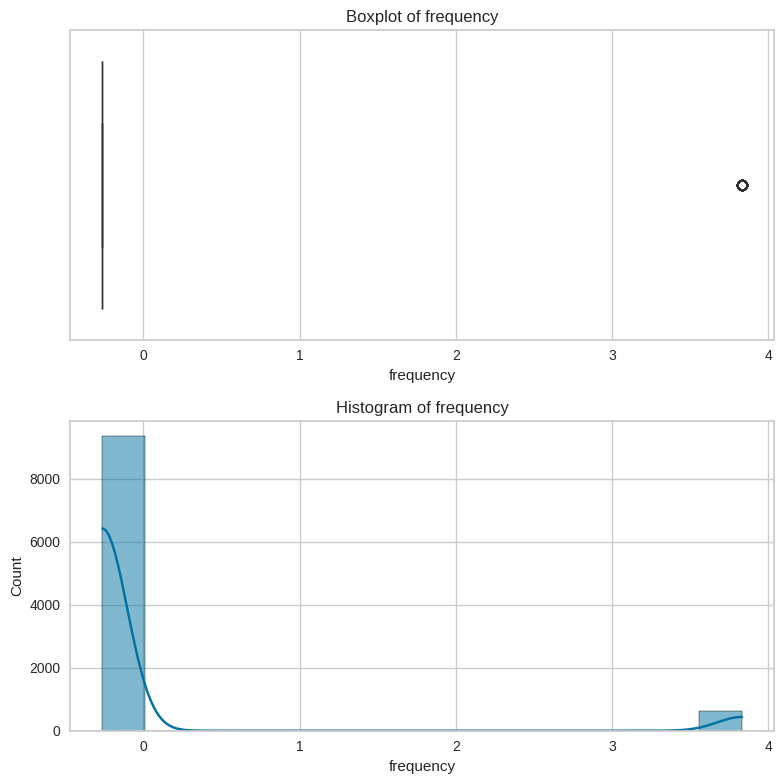

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(yeo_transformed_data, 'frequency')


Information of monetary:
Any Outlier: Yes
Distribution of Data: Positif Skewness
Min: -3.2673067785816565
Max: 3.5753296216595
Mean: -5.456968210637569e-16
Median: 0.03392073156197524


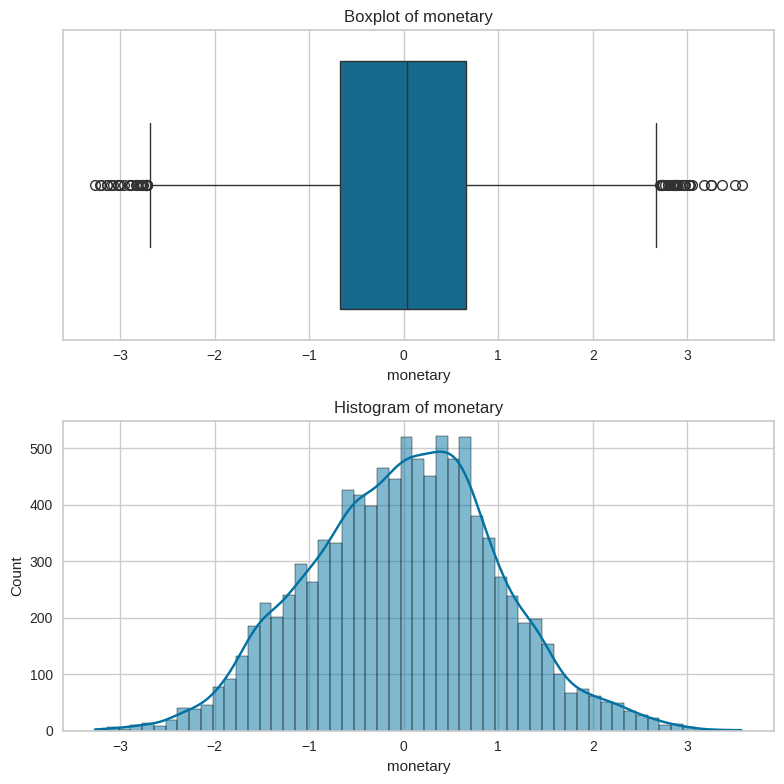

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(yeo_transformed_data, 'monetary')

####**- Square Root**

In [ ]:
sqrt_transformed_data.head()

,recency,frequency,monetary
0,14.798649,1.0,7.354590
1,16.462078,1.0,6.855655
2,11.874342,1.0,7.086607
3,14.352700,1.0,7.347789
4,14.000000,1.0,6.330087



Information of recency:
Any Outlier: No
Distribution of Data: Negatif Skewness
Min: 0.0
Max: 26.362852652928137
Mean: 14.461374275134201
Median: 14.798648586948742


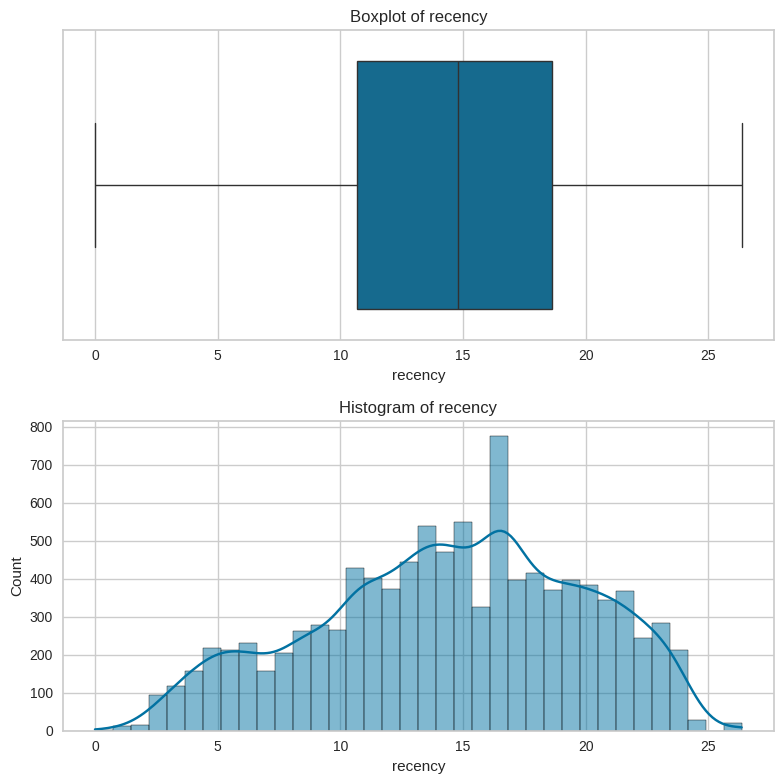

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(sqrt_transformed_data, 'recency')


Information of frequency:
Any Outlier: Yes
Distribution of Data: Positif Skewness
Min: 1.0
Max: 3.4641016151377544
Mean: 1.0336217574806148
Median: 1.0


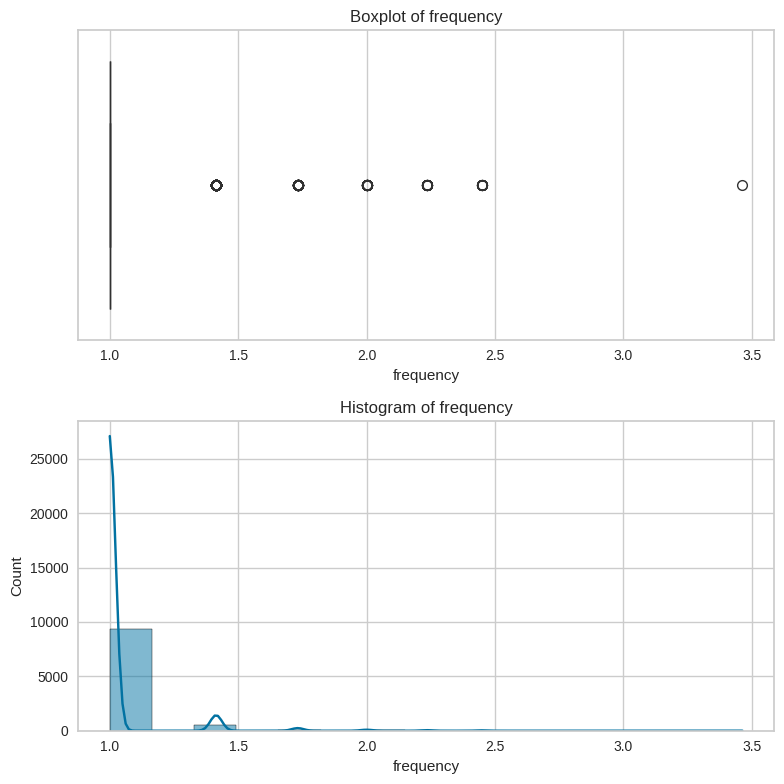

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(sqrt_transformed_data, 'frequency')


Information of monetary:
Any Outlier: Yes
Distribution of Data: Positif Skewness
Min: 3.5902646142032486
Max: 83.24247713757683
Mean: 11.308650987451436
Median: 10.154063151495293


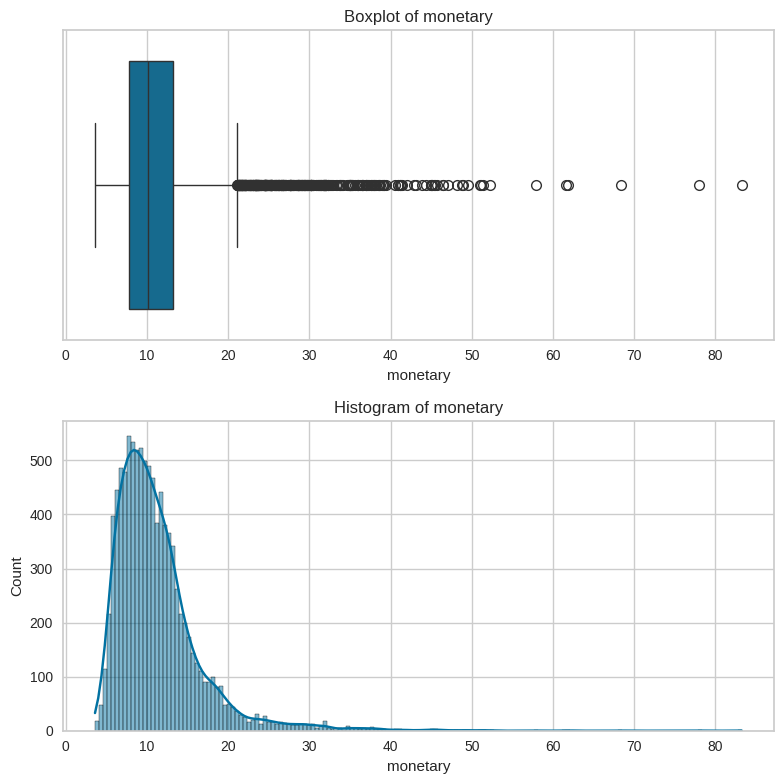

In [ ]:
# Call the function to visualize Boxplot and Histogram plots
visualize_boxplot_histogram(sqrt_transformed_data, 'monetary')

> - Transformasi data yang dipilih yaitu Yeo-Johnson. Karena lebih mengikuti distribusi normal yang secara ground truth baik untuk pemodelan Machine Learning (ML) berbasis perhitungan jarak (distance calculation). Contohnya seperti K-Means untuk clustering.

###**a. Features Selection**

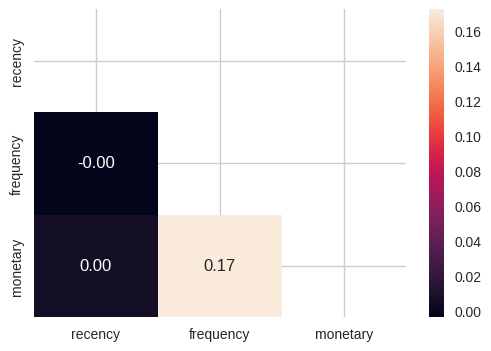

In [ ]:
# check correlation all features with heatmap
corr_ = yeo_transformed_data.corr()
plt.figure(figsize=(6,4))
mask = np.triu(np.ones_like(corr_, dtype=bool))
sns.heatmap(yeo_transformed_data.corr(), annot=True, fmt='.2f', mask=mask)
plt.show()


In [ ]:
def calculate_VIF(data):
    X = sm.add_constant(data.iloc[:,:])
    vif_data = pd.DataFrame([variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))],
                        index = X.columns).reset_index()
    vif_data.columns = ['feature','VIF']
    vif_data = vif_data.loc[vif_data.feature!='const']

    return(vif_data)

In [ ]:
calculate_VIF(yeo_transformed_data)

,feature,VIF
1,recency,1.000042
2,frequency,1.030511
3,monetary,1.030515


###**b. Feature Scalling**




In [ ]:
# Scalling the data :
scaler = RobustScaler()
df_mod = pd.DataFrame(scaler.fit_transform(yeo_transformed_data[['recency','frequency','monetary']]))
df_mod.columns = ['recency','frequency','monetary']
df_mod.head()

,recency,frequency,monetary
0,0.000000,0.0,-0.661965
1,0.210944,0.0,-0.818041
2,-0.364464,0.0,-0.743886
3,-0.056130,0.0,-0.663992
4,-0.100390,0.0,-1.000561


In [ ]:
# Scalling the data :
scaler = RobustScaler()
df_fe_new = pd.DataFrame(scaler.fit_transform(df_fe[['recency','frequency','monetary']]))
df_fe_new.columns = ['recency','frequency','monetary']
df_fe_new.head()

,recency,frequency,monetary
0,0.000000,0.0,-0.439134
1,0.223176,0.0,-0.502654
2,-0.334764,0.0,-0.473806
3,-0.055794,0.0,-0.440030
4,-0.098712,0.0,-0.564741


##**4. Modeling**

**Disclaimer :**

- Modeling menggunakan data sampling agar waktu komputasi tidak menjadi sangat lama atau terjadi error.


###**a. Partitional Clustering**




####**- Elbow Method**

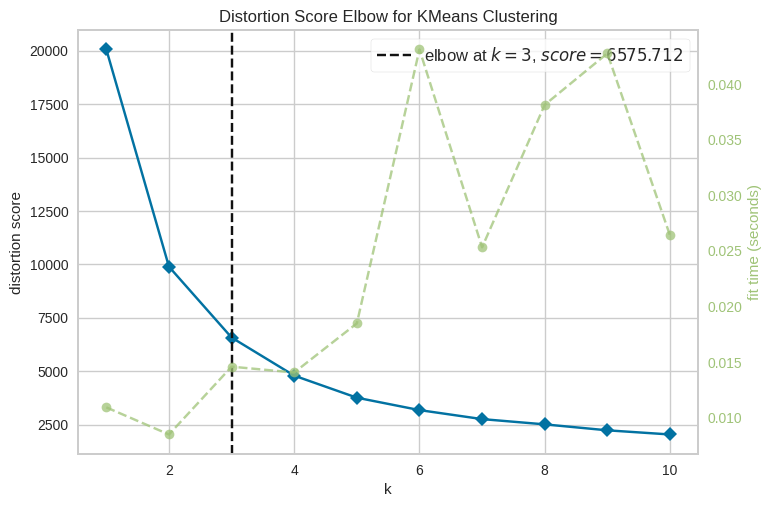

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=42) # define model k-means
visualizer = KElbowVisualizer(model, k=(1,11), timings= True) # k is range of number of clusters.
visualizer.fit(df_mod[['recency','frequency','monetary']]) # Fit data to visualizer
visualizer.show() # Finalize and render figure


####**- Silhouette Score**

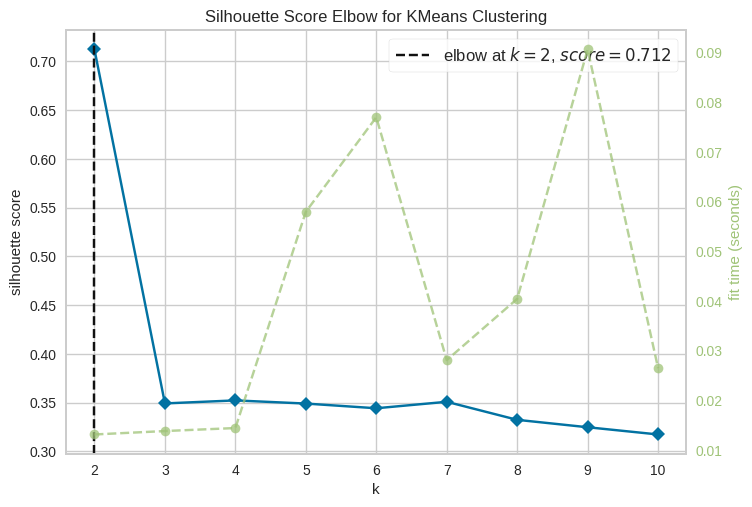

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(init='k-means++', random_state=42) # define model k-means
visualizer = KElbowVisualizer(model, k=(2,11),metric='silhouette', timings= True) # k is range of number of clusters.
visualizer.fit(df_mod[['recency','frequency','monetary']]) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

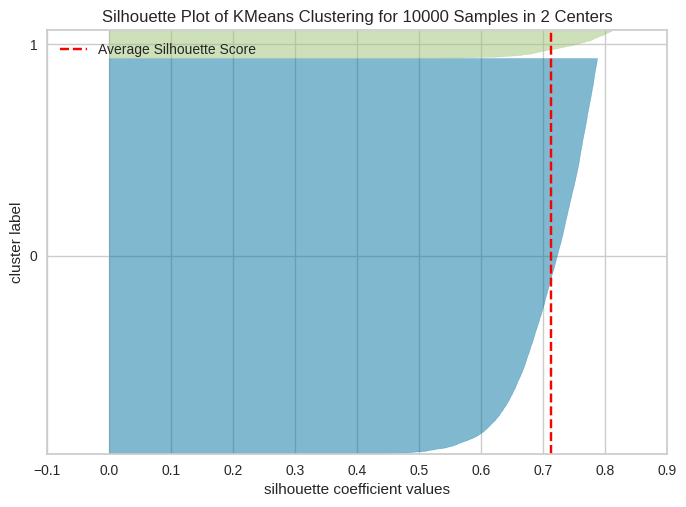

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
model = KMeans(2, init='k-means++', random_state=42) # Instantiate the clustering model and visualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_mod[['recency','frequency','monetary']]) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

####**- Calinski-Harabasz Index**

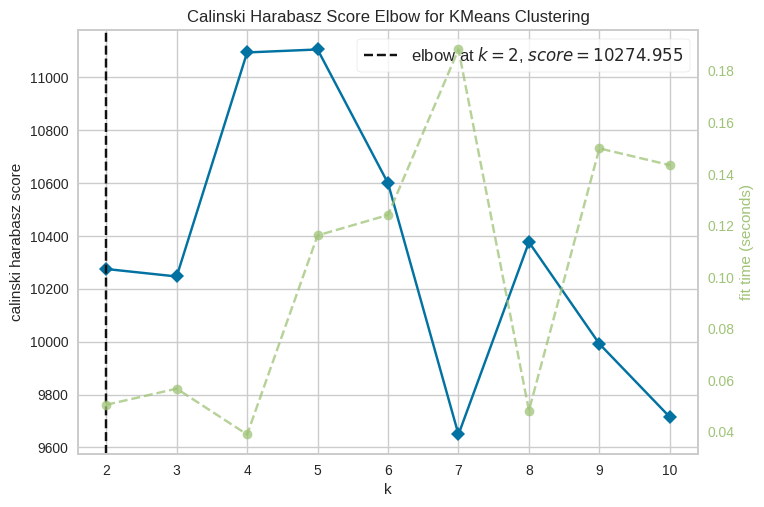

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11),metric='calinski_harabasz', timings= True) # k is range of number of clusters.
visualizer.fit(df_mod[['recency','frequency','monetary']]) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

####**- Fitting K-Means**

In [ ]:
def objective(trial):
    # Tentukan rentang jumlah cluster yang ingin diuji
    n_clusters = trial.suggest_int('n_clusters', 2, 20)

    # Menerapkan K-Means dengan jumlah cluster dari trial saat ini
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit_predict(df_mod)
    labels = kmeans.labels_

    # Menghitung dan mengembalikan skor Silhouette
    # Skor Silhouette tidak dapat dihitung jika hanya ada satu cluster,
    # atau jika jumlah cluster sama dengan jumlah sampel
    if len(np.unique(labels)) < 2 or len(labels) == len(np.unique(labels)):
        return -1
    score = silhouette_score(df_mod, labels)

    return score

In [ ]:
pruner = MedianPruner()
sampler = TPESampler()
study = optuna.create_study(direction='maximize', pruner=pruner, sampler=sampler)  # Maksimalkan Silhouette Score
study.optimize(objective, n_trials=21)  # Jumlah trial yang diinginkan

# Hasil terbaik
print('Best hyperparameters: ', study.best_params)

[I 2024-02-16 12:11:29,953] A new study created in memory with name: no-name-98d5d7b9-c7f1-4e44-9320-385b88944187
[I 2024-02-16 12:11:31,720] Trial 0 finished with value: 0.33244062068133656 and parameters: {'n_clusters': 8}. Best is trial 0 with value: 0.33244062068133656.
[I 2024-02-16 12:11:33,530] Trial 1 finished with value: 0.32953775303028116 and parameters: {'n_clusters': 19}. Best is trial 0 with value: 0.33244062068133656.
[I 2024-02-16 12:11:37,136] Trial 2 finished with value: 0.33199384382467734 and parameters: {'n_clusters': 20}. Best is trial 0 with value: 0.33244062068133656.
[I 2024-02-16 12:11:39,774] Trial 3 finished with value: 0.3523669640751903 and parameters: {'n_clusters': 4}. Best is trial 3 with value: 0.3523669640751903.
[I 2024-02-16 12:11:42,175] Trial 4 finished with value: 0.33481240750112673 and parameters: {'n_clusters': 13}. Best is trial 3 with value: 0.3523669640751903.
[I 2024-02-16 12:11:46,182] Trial 5 finished with value: 0.3302877348013395 and p

Best hyperparameters:  {'n_clusters': 2}


In [ ]:
# Melakukan fitting KMeans pada data
model = KMeans(n_clusters=2, init='k-means++')
kmeans_clusters = model.fit_predict(df_mod[['recency', 'frequency', 'monetary']])


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Asumsikan X adalah DataFrame Anda dan clusters adalah kolom cluster_optics
X = df_mod[['recency', 'frequency', 'monetary']]
clusters = kmeans_clusters

# Membuat figure untuk plot 3D
fig = go.Figure()

# Warna untuk cluster
colors = plt.cm.jet(np.linspace(0, 1, len(set(clusters))))

for i, color in zip(set(clusters), colors):
    if i == -1:
        # Gunakan warna hitam untuk noise/outlier
        fig.add_trace(go.Scatter3d(
            x=X[clusters == i]['recency'],
            y=X[clusters == i]['frequency'],
            z=X[clusters == i]['monetary'],
            mode='markers',
            marker=dict(size=3, color='black'),
            name='Noise'
        ))
    else:
        # Konversi warna matplotlib ke format yang dapat diterima oleh plotly
        color_rgb = f'rgb({color[0]*255}, {color[1]*255}, {color[2]*255})'
        fig.add_trace(go.Scatter3d(
            x=X[clusters == i]['recency'],
            y=X[clusters == i]['frequency'],
            z=X[clusters == i]['monetary'],
            mode='markers',
            marker=dict(size=3, color=color_rgb),
            name=f'Cluster {i}'
        ))

# Menambahkan label sumbu
fig.update_layout(scene=dict(
                    xaxis_title='Recency',
                    yaxis_title='Frequency',
                    zaxis_title='Monetary'),
                    title='K-MEANS Clustering Results',
                    title_x = 0.5)

# Tampilkan plot
fig.show()

###**b. Hierarchical Clustering**

####**- Agglomerative Clustering**

In [ ]:
def objective(trial):
    # Tentukan rentang jumlah cluster yang ingin diuji
    n_clusters = trial.suggest_int('n_clusters', 2, 20)

    # Menerapkan K-Means dengan jumlah cluster dari trial saat ini
    ac = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    ac.fit_predict(df_fe_new[['recency', 'frequency', 'monetary']])
    labels = ac.labels_

    # Menghitung dan mengembalikan skor Silhouette
    # Skor Silhouette tidak dapat dihitung jika hanya ada satu cluster,
    # atau jika jumlah cluster sama dengan jumlah sampel
    if len(np.unique(labels)) < 2 or len(labels) == len(np.unique(labels)):
        return -1
    score = silhouette_score(df_fe_new[['recency', 'frequency', 'monetary']], labels)

    return score

In [ ]:
pruner = MedianPruner()
sampler = TPESampler()
study = optuna.create_study(direction='maximize', pruner=pruner, sampler=sampler)  # Maksimalkan Silhouette Score
study.optimize(objective, n_trials=21)  # Jumlah trial yang diinginkan

# Hasil terbaik
print('Best hyperparameters: ', study.best_params)

[I 2024-02-16 11:11:33,525] A new study created in memory with name: no-name-68a5e28b-194f-44a1-a578-7e7cc9960d1e
[I 2024-02-16 11:11:39,572] Trial 0 finished with value: 0.2821934740302937 and parameters: {'n_clusters': 18}. Best is trial 0 with value: 0.2821934740302937.
[I 2024-02-16 11:11:43,702] Trial 1 finished with value: 0.2836777917716587 and parameters: {'n_clusters': 13}. Best is trial 1 with value: 0.2836777917716587.
[I 2024-02-16 11:11:47,858] Trial 2 finished with value: 0.29670842681244564 and parameters: {'n_clusters': 8}. Best is trial 2 with value: 0.29670842681244564.
[I 2024-02-16 11:11:53,295] Trial 3 finished with value: 0.321605395441793 and parameters: {'n_clusters': 10}. Best is trial 3 with value: 0.321605395441793.
[I 2024-02-16 11:11:57,455] Trial 4 finished with value: 0.30141933800529985 and parameters: {'n_clusters': 12}. Best is trial 3 with value: 0.321605395441793.
[I 2024-02-16 11:12:01,502] Trial 5 finished with value: 0.30141933800529985 and parame

Best hyperparameters:  {'n_clusters': 2}


In [ ]:
# Menerapkan Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=2, linkage='ward')
ac_clusters = ac.fit_predict(df_fe_new[['recency', 'frequency', 'monetary']])


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Asumsikan X adalah DataFrame Anda dan clusters adalah kolom cluster_optics
X = df_fe_new[['recency', 'frequency', 'monetary']]
clusters = ac_clusters

# Membuat figure untuk plot 3D
fig = go.Figure()

# Warna untuk cluster
colors = plt.cm.jet(np.linspace(0, 1, len(set(clusters))))

for i, color in zip(set(clusters), colors):
    if i == -1:
        # Gunakan warna hitam untuk noise/outlier
        fig.add_trace(go.Scatter3d(
            x=X[clusters == i]['recency'],
            y=X[clusters == i]['frequency'],
            z=X[clusters == i]['monetary'],
            mode='markers',
            marker=dict(size=3, color='black'),
            name='Noise'
        ))
    else:
        # Konversi warna matplotlib ke format yang dapat diterima oleh plotly
        color_rgb = f'rgb({color[0]*255}, {color[1]*255}, {color[2]*255})'
        fig.add_trace(go.Scatter3d(
            x=X[clusters == i]['recency'],
            y=X[clusters == i]['frequency'],
            z=X[clusters == i]['monetary'],
            mode='markers',
            marker=dict(size=3, color=color_rgb),
            name=f'Cluster {i}'
        ))

# Menambahkan label sumbu
fig.update_layout(scene=dict(
                    xaxis_title='Recency',
                    yaxis_title='Frequency',
                    zaxis_title='Monetary'),
                    title='Agglomerative Clustering Results',
                    title_x = 0.5)

# Tampilkan plot
fig.show()

####**- Dendogram**

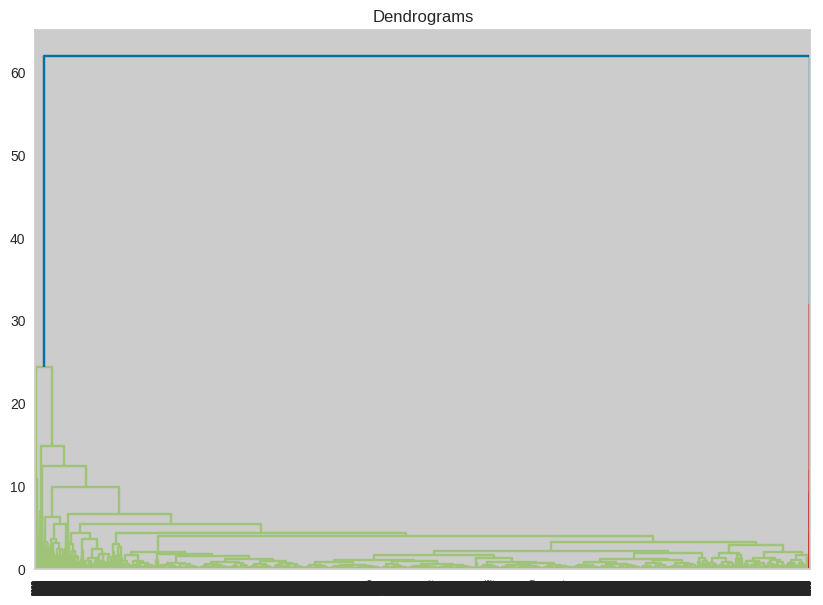

In [ ]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
complete_clustering = linkage(df_fe_new[['recency', 'frequency', 'monetary']],
                              method="complete", metric="euclidean")
dendrogram(complete_clustering)
plt.title("Dendrograms")
plt.show()

###**c. Density-Based Clustering**

####**- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

In [ ]:
def objective(trial):
    # Menentukan rentang untuk hyperparameter yang akan dioptimasi
    eps = trial.suggest_float('eps', 0.01, 1.0)
    min_samples = trial.suggest_int('min_samples', 6, 100)

    # Inisialisasi DBSCAN dengan hyperparameter yang diuji
    model = DBSCAN(eps=eps, min_samples=min_samples, metric='manhattan')
    dbscan_labels = model.fit_predict(df_fe_new)

    # Menghindari error jika hanya terbentuk satu cluster atau semuanya noise
    if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
        score = silhouette_score(df_fe_new, dbscan_labels)
    else:
        score = -1

    return score

In [ ]:
pruner = MedianPruner()
sampler = TPESampler()
study = optuna.create_study(direction='maximize', pruner=pruner, sampler=sampler)  # Maksimalkan Silhouette Score
study.optimize(objective, n_trials=100, n_jobs=-1)  # Jumlah trial yang diinginkan

# Hasil terbaik
print('Best hyperparameters: ', study.best_params)


[I 2024-02-16 14:55:27,191] A new study created in memory with name: no-name-935859d4-6fbb-458a-8466-eaf0d2627539
[I 2024-02-16 14:55:33,183] Trial 1 finished with value: 0.15545182504224248 and parameters: {'eps': 0.26586679605612407, 'min_samples': 11}. Best is trial 1 with value: 0.15545182504224248.
[I 2024-02-16 14:55:34,142] Trial 0 finished with value: 0.2216144594259064 and parameters: {'eps': 0.7476381124273945, 'min_samples': 64}. Best is trial 0 with value: 0.2216144594259064.
[I 2024-02-16 14:55:35,998] Trial 2 finished with value: -0.35950810091269225 and parameters: {'eps': 0.07413736536164094, 'min_samples': 83}. Best is trial 0 with value: 0.2216144594259064.
[I 2024-02-16 14:55:37,810] Trial 3 finished with value: 0.19330709900590123 and parameters: {'eps': 0.5180039989441351, 'min_samples': 13}. Best is trial 0 with value: 0.2216144594259064.
[I 2024-02-16 14:55:40,129] Trial 4 finished with value: 0.2178690532577477 and parameters: {'eps': 0.8392803296881061, 'min_sa

Best hyperparameters:  {'eps': 0.5411638018163775, 'min_samples': 96}


In [ ]:
# Inisialisasi dan fit DBSCAN
# eps adalah jarak maksimum antara dua sampel agar satu sampel dianggap di lingkungan tetangga yang lain
# min_samples adalah jumlah minimum sampel dalam lingkungan tetangga untuk membentuk sebuah cluster
dbscan = DBSCAN(eps=0.54, min_samples=96, metric='manhattan')
dbscan_clusters  = dbscan.fit_predict(df_fe_new)

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Asumsikan X adalah DataFrame Anda dan clusters adalah kolom cluster_optics
X = df_fe_new[['recency', 'frequency', 'monetary']]
clusters = dbscan_clusters

# Membuat figure untuk plot 3D
fig = go.Figure()

# Warna untuk cluster
colors = plt.cm.jet(np.linspace(0, 1, len(set(clusters))))

for i, color in zip(set(clusters), colors):
    if i == -1:
        # Gunakan warna hitam untuk noise/outlier
        fig.add_trace(go.Scatter3d(
            x=X[clusters == i]['recency'],
            y=X[clusters == i]['frequency'],
            z=X[clusters == i]['monetary'],
            mode='markers',
            marker=dict(size=3, color='black'),
            name='Noise'
        ))
    else:
        # Konversi warna matplotlib ke format yang dapat diterima oleh plotly
        color_rgb = f'rgb({color[0]*255}, {color[1]*255}, {color[2]*255})'
        fig.add_trace(go.Scatter3d(
            x=X[clusters == i]['recency'],
            y=X[clusters == i]['frequency'],
            z=X[clusters == i]['monetary'],
            mode='markers',
            marker=dict(size=3, color=color_rgb),
            name=f'Cluster {i}'
        ))

# Menambahkan label sumbu
fig.update_layout(scene=dict(
                    xaxis_title='Recency',
                    yaxis_title='Frequency',
                    zaxis_title='Monetary'),
                    title='DBSCAN Clustering Results',
                    title_x = 0.5)

# Tampilkan plot
fig.show()

####**- HDBSCAN (Hierarchical Extension of DBSCAN)**

In [ ]:
def objective(trial):
    # Menentukan rentang untuk hyperparameter yang akan dioptimasi
    min_cluster_size = trial.suggest_int('min_cluster_size', 6, 100)
    min_samples = trial.suggest_int('min_samples', 6, 100)

    # Inisialisasi DBSCAN dengan hyperparameter yang diuji
    model = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples,
                    cluster_selection_method='eom', metric='manhattan')
    hdbscan_labels = model.fit_predict(df_fe_new)

    # Menghindari error jika hanya terbentuk satu cluster atau semuanya noise
    if len(set(hdbscan_labels)) > 1 and -1 in hdbscan_labels:
        score = silhouette_score(df_fe_new, hdbscan_labels)
    else:
        score = -1

    return score

In [ ]:
pruner = MedianPruner()
sampler = TPESampler()
study = optuna.create_study(direction='maximize', pruner=pruner, sampler=sampler)  # Maksimalkan Silhouette Score
study.optimize(objective, n_trials=100, n_jobs=-1)  # Jumlah trial yang diinginkan

# Hasil terbaik
print('Best hyperparameters: ', study.best_params)


[I 2024-02-16 15:00:04,002] A new study created in memory with name: no-name-46edf24f-5131-4a89-9fb2-3f8916291a3c
[I 2024-02-16 15:00:09,160] Trial 0 finished with value: 0.19512717587003492 and parameters: {'min_cluster_size': 57, 'min_samples': 66}. Best is trial 0 with value: 0.19512717587003492.
[I 2024-02-16 15:00:09,801] Trial 1 finished with value: 0.19181303313902587 and parameters: {'min_cluster_size': 59, 'min_samples': 96}. Best is trial 0 with value: 0.19512717587003492.
[I 2024-02-16 15:00:14,439] Trial 2 finished with value: 0.1944000448232958 and parameters: {'min_cluster_size': 63, 'min_samples': 78}. Best is trial 0 with value: 0.19512717587003492.
[I 2024-02-16 15:00:15,548] Trial 3 finished with value: 0.19336172937450152 and parameters: {'min_cluster_size': 8, 'min_samples': 89}. Best is trial 0 with value: 0.19512717587003492.
[I 2024-02-16 15:00:18,392] Trial 4 finished with value: 0.2094175160811626 and parameters: {'min_cluster_size': 42, 'min_samples': 19}. Bes

Best hyperparameters:  {'min_cluster_size': 20, 'min_samples': 6}


In [ ]:
# Menggunakan HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=20, min_samples=6,
                        cluster_selection_method='eom', metric='manhattan')
hdbscan_clusters = hdbscan_model.fit_predict(df_fe_new)

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Asumsikan X adalah DataFrame Anda dan clusters adalah kolom cluster_optics
X = df_fe_new[['recency', 'frequency', 'monetary']]
clusters = hdbscan_clusters

# Membuat figure untuk plot 3D
fig = go.Figure()

# Warna untuk cluster
colors = plt.cm.jet(np.linspace(0, 1, len(set(clusters))))

for i, color in zip(set(clusters), colors):
    if i == -1:
        # Gunakan warna hitam untuk noise/outlier
        fig.add_trace(go.Scatter3d(
            x=X[clusters == i]['recency'],
            y=X[clusters == i]['frequency'],
            z=X[clusters == i]['monetary'],
            mode='markers',
            marker=dict(size=3, color='black'),
            name='Noise'
        ))
    else:
        # Konversi warna matplotlib ke format yang dapat diterima oleh plotly
        color_rgb = f'rgb({color[0]*255}, {color[1]*255}, {color[2]*255})'
        fig.add_trace(go.Scatter3d(
            x=X[clusters == i]['recency'],
            y=X[clusters == i]['frequency'],
            z=X[clusters == i]['monetary'],
            mode='markers',
            marker=dict(size=3, color=color_rgb),
            name=f'Cluster {i}'
        ))

# Menambahkan label sumbu
fig.update_layout(scene=dict(
                    xaxis_title='Recency',
                    yaxis_title='Frequency',
                    zaxis_title='Monetary'),
                    title='HDBSCAN Clustering Results',
                    title_x = 0.5)

# Tampilkan plot
fig.show()

####**- OPTICS (Ordering Points to Identify the Clustering Structure)**

**Disclaimer:**
Kita tidak melakukan modeling ML dengan algoritma OPTICS. Hal ini dikarenakan waktu komputasi yang lama (>15 menit).

In [ ]:
def objective(trial):
    # Menentukan rentang untuk hyperparameter yang akan dioptimasi
    min_cluster_size = trial.suggest_int('min_cluster_size', 2, 100)
    min_samples = trial.suggest_int('min_samples', 2, 100)
    xi = trial.suggest_float('xi', 0.01, 1.0)

    # Inisialisasi DBSCAN dengan hyperparameter yang diuji
    model = OPTICS(min_cluster_size=min_cluster_size, xi=xi, min_samples=min_samples)
    optics_labels = model.fit_predict(df_fe_new)

    # Menghindari error jika hanya terbentuk satu cluster atau semuanya noise
    if len(set(optics_labels)) > 1 and -1 in optics_labels:
        score = silhouette_score(df_fe_new, optics_labels)
    else:
        score = -1

    return score

In [ ]:
pruner = MedianPruner()
sampler = TPESampler()
study = optuna.create_study(direction='maximize', pruner=pruner, sampler=sampler)  # Maksimalkan Silhouette Score
study.optimize(objective, n_trials=100)  # Jumlah trial yang diinginkan

# Hasil terbaik
print('Best hyperparameters: ', study.best_params)


[I 2024-02-16 15:41:51,780] A new study created in memory with name: no-name-c3d95df1-19a4-4b4e-8e13-fa3303ec1602
[I 2024-02-16 15:42:10,136] Trial 0 finished with value: -1.0 and parameters: {'min_cluster_size': 73, 'min_samples': 76, 'xi': 0.0952884087782854}. Best is trial 0 with value: -1.0.
[I 2024-02-16 15:42:27,216] Trial 1 finished with value: -1.0 and parameters: {'min_cluster_size': 59, 'min_samples': 60, 'xi': 0.8524130957748826}. Best is trial 0 with value: -1.0.
[I 2024-02-16 15:42:44,417] Trial 2 finished with value: -1.0 and parameters: {'min_cluster_size': 70, 'min_samples': 40, 'xi': 0.4747626090997002}. Best is trial 0 with value: -1.0.
[I 2024-02-16 15:43:09,884] Trial 3 finished with value: -1.0 and parameters: {'min_cluster_size': 28, 'min_samples': 82, 'xi': 0.09756600706634326}. Best is trial 0 with value: -1.0.
[W 2024-02-16 15:43:24,838] Trial 4 failed with parameters: {'min_cluster_size': 33, 'min_samples': 26, 'xi': 0.4382727682894213} because of the followin

KeyboardInterrupt: 

In [ ]:
# Menggunakan HDBSCAN
optics_model = OPTICS(min_cluster_size=39, min_samples=34, xi=0.08186809116664037)
optics_clusters  = optics_model.fit_predict(df_fe_new[['recency', 'frequency', 'monetary']])


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Asumsikan X adalah DataFrame Anda dan clusters adalah kolom cluster_optics
X = df_fe_new[['recency', 'frequency', 'monetary']]
clusters = df_fe_new['cluster_optics']

# Membuat figure untuk plot 3D
fig = go.Figure()

# Warna untuk cluster
colors = plt.cm.jet(np.linspace(0, 1, len(set(clusters))))

for i, color in zip(set(clusters), colors):
    if i == -1:
        # Gunakan warna hitam untuk noise/outlier
        fig.add_trace(go.Scatter3d(
            x=X[clusters == i]['recency'],
            y=X[clusters == i]['frequency'],
            z=X[clusters == i]['monetary'],
            mode='markers',
            marker=dict(size=3, color='black'),
            name='Noise'
        ))
    else:
        # Konversi warna matplotlib ke format yang dapat diterima oleh plotly
        color_rgb = f'rgb({color[0]*255}, {color[1]*255}, {color[2]*255})'
        fig.add_trace(go.Scatter3d(
            x=X[clusters == i]['recency'],
            y=X[clusters == i]['frequency'],
            z=X[clusters == i]['monetary'],
            mode='markers',
            marker=dict(size=3, color=color_rgb),
            name=f'Cluster {i}'
        ))

# Menambahkan label sumbu
fig.update_layout(scene=dict(
                    xaxis_title='Recency',
                    yaxis_title='Frequency',
                    zaxis_title='Monetary'),
                    title='OPTICS Clustering Results',
                    title_x = 0.5)

# Tampilkan plot
fig.show()

####**- BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)**

In [ ]:
# Fungsi tujuan untuk Optuna
def objective(trial):
    # Mendefinisikan ruang pencarian hyperparameter
    threshold = trial.suggest_float('threshold', 0.3, 0.5)
    branching_factor = trial.suggest_int('branching_factor', 50, 100)
    n_clusters = trial.suggest_int('n_clusters', 2, 100)

    # Membuat dan melatih model BIRCH
    model = Birch(threshold=threshold, branching_factor=branching_factor, n_clusters=n_clusters, compute_labels=True)
    model.fit(df_fe_new)
    birch_labels = model.predict(df_fe_new)

    # Menghitung silhouette score sebagai metrik evaluasi
    score = silhouette_score(df_fe_new, birch_labels)

    return score

In [ ]:
pruner = MedianPruner()
sampler = TPESampler()
study = optuna.create_study(direction='maximize', pruner=pruner, sampler=sampler)  # Maksimalkan Silhouette Score
study.optimize(objective, n_trials=100)  # Jumlah trial yang diinginkan

# Hasil terbaik
print('Best hyperparameters: ', study.best_params)

[I 2024-02-16 15:53:40,485] A new study created in memory with name: no-name-fbd9e10d-a8c8-4e4b-98ad-f332af395279
[I 2024-02-16 15:53:42,473] Trial 0 finished with value: 0.57102132731286 and parameters: {'threshold': 0.44730188619675004, 'branching_factor': 59, 'n_clusters': 10}. Best is trial 0 with value: 0.57102132731286.
[I 2024-02-16 15:53:44,341] Trial 1 finished with value: 0.28776762920044713 and parameters: {'threshold': 0.37749426979426315, 'branching_factor': 50, 'n_clusters': 60}. Best is trial 0 with value: 0.57102132731286.
[I 2024-02-16 15:53:46,223] Trial 2 finished with value: 0.3242964818505709 and parameters: {'threshold': 0.3967689556560788, 'branching_factor': 66, 'n_clusters': 50}. Best is trial 0 with value: 0.57102132731286.
[I 2024-02-16 15:53:48,511] Trial 3 finished with value: 0.3204492269347548 and parameters: {'threshold': 0.46905083581466095, 'branching_factor': 90, 'n_clusters': 50}. Best is trial 0 with value: 0.57102132731286.
[I 2024-02-16 15:53:50,8

Best hyperparameters:  {'threshold': 0.4462541885435676, 'branching_factor': 54, 'n_clusters': 2}


In [ ]:
# Membuat dan melatih model BIRCH
model = Birch(threshold=0.4120827449143746, branching_factor=67, n_clusters=4, compute_labels=True)
model.fit(df_fe_new)
birch_clusters = model.predict(df_fe_new)

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Asumsikan X adalah DataFrame Anda dan clusters adalah kolom cluster_optics
X = df_fe_new[['recency', 'frequency', 'monetary']]
clusters = birch_clusters

# Membuat figure untuk plot 3D
fig = go.Figure()

# Warna untuk cluster
colors = plt.cm.jet(np.linspace(0, 1, len(set(clusters))))

for i, color in zip(set(clusters), colors):
    if i == -1:
        # Gunakan warna hitam untuk noise/outlier
        fig.add_trace(go.Scatter3d(
            x=X[clusters == i]['recency'],
            y=X[clusters == i]['frequency'],
            z=X[clusters == i]['monetary'],
            mode='markers',
            marker=dict(size=3, color='black'),
            name='Noise'
        ))
    else:
        # Konversi warna matplotlib ke format yang dapat diterima oleh plotly
        color_rgb = f'rgb({color[0]*255}, {color[1]*255}, {color[2]*255})'
        fig.add_trace(go.Scatter3d(
            x=X[clusters == i]['recency'],
            y=X[clusters == i]['frequency'],
            z=X[clusters == i]['monetary'],
            mode='markers',
            marker=dict(size=3, color=color_rgb),
            name=f'Cluster {i}'
        ))

# Menambahkan label sumbu
fig.update_layout(scene=dict(
                    xaxis_title='Recency',
                    yaxis_title='Frequency',
                    zaxis_title='Monetary'),
                    title='BIRCH Clustering Results',
                    title_x = 0.5)

# Tampilkan plot
fig.show()

###**d. Silhouette Score All Models**

In [ ]:
# Menghitung silhouette score untuk setiap model
silhouette_scores = [
    ('KMeans', silhouette_score(df_mod, kmeans_clusters)),
    ('Agglomerative', silhouette_score(df_fe_new, ac_clusters)),
    ('DBSCAN', silhouette_score(df_fe_new, dbscan_clusters)),
    ('HDBSCAN', silhouette_score(df_fe_new, hdbscan_clusters)),
    ('BIRCH', silhouette_score(df_fe_new, birch_clusters))
]

# Membuat DataFrame
df_silhouette_scores = pd.DataFrame(silhouette_scores, columns=['Model', 'Silhouette_Score'])
df_silhouette_scores = df_silhouette_scores.sort_values('Silhouette_Score', ascending=False)
df_silhouette_scores

,Model,Silhouette_Score
4,BIRCH,0.867227
1,Agglomerative,0.803258
0,KMeans,0.712237
2,DBSCAN,0.610274
3,HDBSCAN,0.276640


###**e. Pipelining Model**

In [ ]:
# membuat pipeline
birch_tuned=Pipeline([
            ('scaler', RobustScaler()),
            ('birch_model',Birch(threshold=0.4120827449143746, branching_factor=67,
                                 n_clusters=4, compute_labels=True))])
birch_tuned.fit(df_fe)

Pipeline(steps=[('scaler', RobustScaler()),
                ('birch_model',
                 Birch(branching_factor=67, n_clusters=4,
                       threshold=0.4120827449143746))])

##**5.Deployment**

###**a. Save Best Model ML with pickle**

In [ ]:
import pickle

In [ ]:
pickle.dump(birch_tuned,open('birch_tuned.pkl','wb'))

###**b.Load Best Model ML for Model Inference**

In [ ]:
model = pickle.load(open('birch_tuned.pkl','rb'))
model

Pipeline(steps=[('scaler', RobustScaler()),
                ('birch_model',
                 Birch(branching_factor=67, n_clusters=4,
                       threshold=0.4120827449143746))])

In [ ]:
new_data = [{'recency': 125,
             'frequency': 10,
             'monetary': 2505.75}
             ]

data_testing1= pd.DataFrame(new_data,index=[0])
data_testing1

,recency,frequency,monetary
0,125,10,2505.75


In [ ]:
def prediction(pred):
    if pred[0]==0:
        return "Cluster 0"
    elif pred[0]==1:
        return "Cluster 1"
    elif pred[0]==2:
        return "Cluster 2"
    elif pred[0]==3:
        return "Cluster 3"
    elif pred[0]==4:
        return "Cluster 4"
    else:
        return "Noise/Not in Clusters"

In [ ]:
pred = birch_tuned.predict(data_testing1)

In [ ]:
prediction(pred)

'Cluster 2'

##**5. Conclusions**

###**a. Model Evaluation**

> - Evaluasi performa model yang lebih relevan digunakan yaitu Silhouette Score (Jika label ground truth tidak diketahui, evaluasi harus dilakukan dengan menggunakan model itu sendiri)
> - Berdasarkan Hasil Silhouette Score, Model dengan score tertinggi ialah BIRCH dan terendah ialah HDBSCAN.
> - Jika meninjau pengelompokan distribusi data berdasarkan IQR, maka sebenarnya terdapat 4 segment (Q1, Q2, Q3, dan Q4) yang dapat pula dibuatkan labelnya. Karena tujuan kita untuk melakukan Clustering, maka kita tidak melakukan pelabelan agar model dapat melakukan pemetaan/pengelompokkan data berdasarkan metode tertentu berdasarkan fitur yang ada.
> - Hasil visualisasi nampaknya, model BIRCH paling menyakinkan untuk dipilih. Hal ini karena hasil clustering cukup representatif menggambarkan cluster dari data asli (menyesuaikan dengan distribusi data se-original mungkin).
> - Model BIRCH yang dipilih dari parameter yang menghasilkan model dengan Silhouette Score = 0.87 dan bukan merupakan Best Parameter (Silhouette Score = 0.95). Hal ini menimbang pula dari faktor Bias-Variance Trade Off. Agar model tidak mengalami overfitting ataupun undefitting.



###**b. Customer Characteristics/Segmentation From The Clusters**

In [ ]:
df_fe['birch_clusters']= birch_clusters

In [ ]:
df_fe.groupby('birch_clusters').agg(
    {'recency': ['mean', 'min', 'max'],
     'frequency': ['mean', 'min', 'max'],
     'monetary': ['mean', 'min', 'max','count'] })

recency           frequency             monetary           \
                      mean  min  max      mean min max         mean      min   
birch_clusters                                                                 
0               238.409687    0  695  1.086781   1  12   143.019266    12.89   
1               160.750000   68  215  1.250000   1   2  3914.852500  3358.24   
2               226.154762    3  565  1.261905   1   6  1592.620595  1110.59   
3               420.500000  278  563  3.500000   1   6  6505.425000  6081.54   

                               
                    max count  
birch_clusters                 
0               1205.00  9910  
1               4681.78     4  
2               2732.06    84  
3               6929.31     2

**Berdasarkan Rata-Rata Recency, Frequency, dan Monetary, dapat disimpulkan bahwa:**

- **Cluster 0:**
    - Kustomer yang sudah lama tidak aktif berbelanja yang memiliki jumlah transaksi berulang yang kecil dengan spending/biaya pengeluaran dengan besaran yang juga kecil.

- **Cluster 1:**
    - Kustomer yang beresiko untuk menjadi tidak aktif dalam berbelanja yang memiliki jumlah transaksi berulang yang juga kecil dengan spending/biaya pengeluaran dengan besaran yang lebih besar dari cluster 0 dan 2.

- **Cluster 2:**
    - Kustomer yang sudah lama tidak aktif berbelanja dan  berbelanja dengan jumlah transaksi berulang yang kecil dengan spending/biaya pengeluaran dengan besaran yang lebih besar dari cluster 0.

- **Cluster 3:**
    - Kustomer yang bisa dianggap lost/sudah sangat lama tidak aktif berbelanja dan berbelanja dengan jumlah transaksi berulang yang lumayan besar dengan spending/biaya pengeluaran dengan besaran tertinggi dari semua cluster.